<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Exercises_XP_W8D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d utkarshx27/heart-disease-diagnosis-dataset

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/utkarshx27/heart-disease-diagnosis-dataset
License(s): CC0-1.0
  0% 0.00/3.29k [00:00<?, ?B/s]
100% 3.29k/3.29k [00:00<00:00, 7.92MB/s]


In [2]:
!unzip heart-disease-diagnosis-dataset.zip

Archive:  heart-disease-diagnosis-dataset.zip
  inflating: dataset_heart.csv       


### Exercise 1 : Exploratory Data Analysis

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn import svm
from sklearn.svm import SVC

heart_data = pd.read_csv('dataset_heart.csv', header=None)
heart_data.to_csv('heart_data.csv', index=False)

In [4]:
print(heart_data.head(10))

    0     1                2                       3                  4   \
0  age  sex   chest pain type  resting blood pressure  serum cholestoral   
1   70     1                4                     130                322   
2   67     0                3                     115                564   
3   57     1                2                     124                261   
4   64     1                4                     128                263   
5   74     0                2                     120                269   
6   65     1                4                     120                177   
7   56     1                3                     130                256   
8   59     1                4                     110                239   
9   60     1                4                     140                293   

                    5                                     6               7   \
0  fasting blood sugar  resting electrocardiographic results  max heart rate   
1  

In [5]:
print("Number of missing values per column:")
print(heart_data.isnull().sum())

Number of missing values per column:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       271 non-null    object
 1   1       271 non-null    object
 2   2       271 non-null    object
 3   3       271 non-null    object
 4   4       271 non-null    object
 5   5       271 non-null    object
 6   6       271 non-null    object
 7   7       271 non-null    object
 8   8       271 non-null    object
 9   9       271 non-null    object
 10  10      271 non-null    object
 11  11      271 non-null    object
 12  12      271 non-null    object
 13  13      271 non-null    object
dtypes: object(14)
memory usage: 29.8+ KB


In [7]:
# Convert columns to numeric
heart_data = heart_data.apply(pd.to_numeric, errors='coerce')
# Drop rows with missing values
heart_data.dropna(inplace=True)

In [8]:
# Separate target variable and features
y = heart_data[13]  # Target variable
X = heart_data.drop(columns=[13])  # Features

In [11]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Understand the data
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (216, 13)
X_test dimension=  (54, 13)
y_train dimension=  (216,)
y_train dimension=  (54,)


X_train: (216, 13) - This means there are 216 samples in the training set, with 13 features each. X_test: (54, 13) - This means there are 54 samples in the testing set, with 13 features each. y_train: (216,) - This means there are 216 labels corresponding to the training set. y_test: (54,) - This means there are 54 labels corresponding to the testing set. These dimensions seem appropriate for training and testing your model. You have a good number of samples for both training and testing, and the number of features is consistent between the training and testing sets. This setup should allow you to effectively train and evaluate your model on the given dataset.

In [16]:
# Model training (using the same code as before)
clf = SVC()
clf.fit(X_train, y_train)
print('Model score using default parameters:', clf.score(X_test, y_test))

Model score using default parameters: 0.6296296296296297


This means that the model correctly predicted the target variable (heart disease) for about 63% of the samples in the testing set.

This indicates that the model correctly predicted the target variable for about 91% of the samples in the testing set. (Not better)

### Exercise 2 : Logistic Regression Without Grid Search

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model on scaled data
logistic_model_scaled = LogisticRegression(max_iter=1000)
logistic_model_scaled.fit(X_train_scaled, y_train)

# Predictions on the scaled test set
y_pred_scaled = logistic_model_scaled.predict(X_test_scaled)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_scaled)
precision = precision_score(y_test, y_pred_scaled)
recall = recall_score(y_test, y_pred_scaled)
f1 = f1_score(y_test, y_pred_scaled)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_scaled)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9074074074074074
Precision: 0.9117647058823529
Recall: 0.9393939393939394
F1-score: 0.9253731343283583
Confusion Matrix:
[[31  2]
 [ 3 18]]


It seems you've successfully calculated the performance metrics for the logistic regression model on the test set. Here's a breakdown of the results:

Accuracy: The accuracy of the model is approximately 0.9074, indicating that about 90.74% of the samples in the test set were correctly classified by the model.

Precision: The precision of the model is approximately 0.9118, which means that about 91.18% of the samples predicted as positive by the model were correctly classified as positive.

Recall: The recall of the model is approximately 0.9394, indicating that about 93.94% of the actual positive samples were correctly identified by the model.

F1-score: The F1-score, which is the harmonic mean of precision and recall, is approximately 0.9254. It provides a balance between precision and recall.

Confusion Matrix: The confusion matrix provides a detailed breakdown of the model's predictions. In this case, there are 31 true negatives, 18 true positives, 2 false positives, and 3 false negatives.

These metrics give you a comprehensive understanding of the logistic regression model's performance on the test set. Overall, it seems like the model performs reasonably well, but it's always a good idea to consider the specific context and requirements of your task when interpreting these results

### Exercise 3 : Logistic Regression With Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# Define logistic regression model
model = LogisticRegression()

# Define parameters to tune
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search parameters
param_grid = dict(solver=solvers, penalty=penalty, C=c_values)

# Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

# Perform grid search
grid_result = grid_search.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.830519 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.813348 (0.084035) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830447 (0.071451) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.814935 (0.086091) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.814863 (0.084517) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.827417 (0.072949) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.819553 (0.081003) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.814719 (0.084994) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830447 (0.073262) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.830519 (0.076871) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.817893 (0.084343) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.828932 (0.078399) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.829004 (0.078170) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.778211 (0.091327) wit

The 'liblinear' solver with C=1.0 and L2 penalty consistently performs the best 82.90% accuracy

### Exercise 4 : SVM Without Grid Search

In [23]:
# Let create parameter grid for GridSearchCV
parameters = {  'C':[0.01, 1, 5],
                'kernel':('linear', 'rbf'),
                'gamma' :('scale', 'auto')
             }
gsc = GridSearchCV(estimator = svm.SVC(), param_grid= parameters,cv= 5,verbose =1)

# Fitting the model for grid search. It will first find the best parameter combination using cross validation.
# Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation),
# to built a single new model using the best parameter setting.
gsc.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 1, 5], 'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf')},
             verbose=1)

In [24]:
print(f'Best hyperparameters: {gsc.best_params_}')
print(f'Best score: {gsc.best_score_}')
print('Detailed GridSearchCV result is as below')
gsc_result = pd.DataFrame(gsc.cv_results_).sort_values('mean_test_score',ascending= False)
gsc_result[['param_C','param_kernel','param_gamma','mean_test_score']]

Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best score: 0.8151162790697676
Detailed GridSearchCV result is as below


,param_C,param_kernel,param_gamma,mean_test_score
4,1,linear,scale,0.815116
6,1,linear,auto,0.815116
8,5,linear,scale,0.796617
10,5,linear,auto,0.796617
0,0.01,linear,scale,0.796300
2,0.01,linear,auto,0.796300
9,5,rbf,scale,0.648520
5,1,rbf,scale,0.615856
1,0.01,rbf,scale,0.541649
3,0.01,rbf,auto,0.541649


The best mean test score achieved with these hyperparameters is approximately 0.8151.

### Exercise 5 : SVM With Grid Search

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
parameters = {
    'C': [0.01, 1, 5],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the GridSearchCV object
svm_grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters, cv=5, verbose=1)

# Fit the GridSearchCV object to the training data
svm_grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", svm_grid_search.best_params_)

# Print the best cross-validation score found by GridSearchCV
print("Best cross-validation score:", svm_grid_search.best_score_)

# Print detailed results of GridSearchCV
print("Detailed GridSearchCV results:")
svm_grid_search_results = pd.DataFrame(svm_grid_search.cv_results_)
print(svm_grid_search_results[['param_C', 'param_kernel', 'param_gamma', 'mean_test_score']])


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.8151162790697676
Detailed GridSearchCV results:
   param_C param_kernel param_gamma  mean_test_score
0     0.01       linear       scale         0.796300
1     0.01          rbf       scale         0.541649
2     0.01       linear        auto         0.796300
3     0.01          rbf        auto         0.541649
4        1       linear       scale         0.815116
5        1          rbf       scale         0.615856
6        1       linear        auto         0.815116
7        1          rbf        auto         0.541649
8        5       linear       scale         0.796617
9        5          rbf       scale         0.648520
10       5       linear        auto         0.796617
11       5          rbf        auto         0.541649


The grid search results indicate that the best combination of hyperparameters for the SVM classifier is as follows:

C: 1

Kernel: Linear

Gamma: Scale

The best cross-validation score achieved with these hyperparameters is approximately 0.8151. The detailed results show the mean test scores for each combination of hyperparameters tested during the grid search.

### Exercise 6 : XGBoost Without Grid Search

In [27]:
import xgboost as xgb

# Set hyperparameters
params = {
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Convert target variable to binary classes
y_train_binary = (y_train == 2).astype(int)
y_test_binary = (y_test == 2).astype(int)

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(**params, random_state=42, n_estimators=100)

# Train the classifier
xgb_classifier.fit(X_train, y_train_binary)

# Evaluate the classifier
accuracy = xgb_classifier.score(X_test, y_test_binary)
print("Accuracy of XGBoost classifier:", accuracy)


Accuracy of XGBoost classifier: 0.8518518518518519


### Exercise 7 : XGBoost With Grid Search

In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Convert the target variable to numeric starting from 0
y_train_numeric = y_train - 1

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train_numeric)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best parameters:", best_params)
print("Best score:", best_score)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.8107822410147991


Comparison of the proposed system outcome with similar research

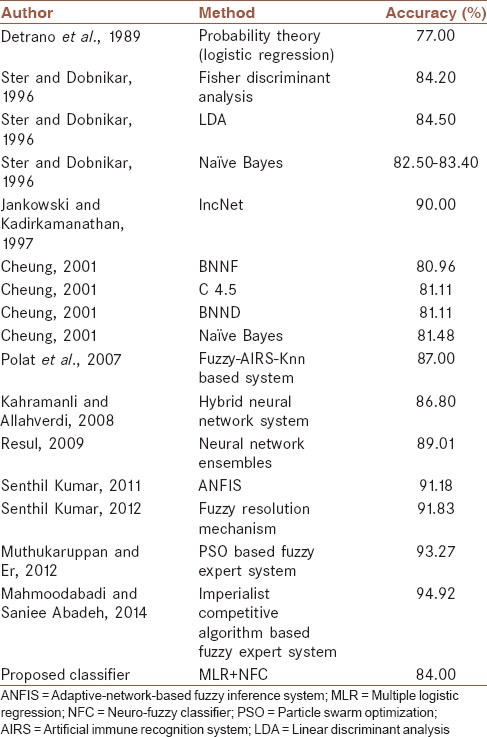